# El corrido de Gregorio Cortez

## Mapping the manhunt of Rio Grande border folk hero Gregorio Cortez:  the largest manhunt in U.S. history.

### June 14, 1901 to June 22, 1901

### based on lyrics from the Corrido de Gregorio Cortez (variant x english translation by Americo Paredes)

#### project author Diane López 

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

from geograpy import places
import re

import geopy
from geopy.geocoders import ArcGIS
#from geopy.extra.rate_limiter import RateLimiter

import shapely
from shapely.geometry import Point
from shapely.wkt import loads
import shapely.wkt
from shapely import wkt

import contextily as cx
import matplotlib.pyplot as plt #to make sure there are no errors when plotting a graph
import pyproj

#import nltk

import spacy
from spacy import displacy

import locationtagger
nlp = spacy.load("en_core_web_sm")

In [2]:
text = "corrido corpus\ElCorridodeGregorioCortez_X.txt"
with open(text, 'r', encoding='utf-8') as c:
    text = c.read()
    
def clean_text(text):
    cleaned= re.sub(r'[":;,.“”]', "", text)
    return(cleaned)
text = clean_text(text)
#print(text)


TxGPE=[]
nlp = spacy.load("tx_trained_ner")
doc =nlp(text) 
#print(doc)
for ent in doc.ents:
    #print(ent.text, ent.label_)
    if ent.label_ == "GPE":
        TxGPE.append(ent.text)
print(TxGPE)

['Karnes', 'Gonzales', 'Belmont', 'Laredo', 'Encinal']


In [3]:
ents = [(e.text, e.start_char, e.end_char, e.label_)for e in doc.ents]
print(ents)

ents = [(e.text)for e in doc.ents]
print(ents)

[('Karnes', 18, 24, 'GPE'), ('Gonzales', 1051, 1059, 'GPE'), ('Belmont', 1140, 1147, 'GPE'), ('Laredo', 1550, 1556, 'GPE'), ('Encinal', 1864, 1871, 'GPE')]
['Karnes', 'Gonzales', 'Belmont', 'Laredo', 'Encinal']


In [4]:
displacy.render(doc, style ='ent', jupyter=True, page=True)

Geoparsing: Finding places from the corrido lyrics

In [5]:
pc = places.PlaceContext(ents)

pc.set_countries()
print (pc.countries) #['United States']

pc.set_regions()
print(pc.regions) #['Texas'])

pc.set_cities()
print(pc.cities) #['Brownsville'])

#print(pc.address_strings) #['Brownsville','Texas, United States'])
#print(pc.cities[0:5])

[]
[]
['Laredo', 'Belmont', 'Gonzales', 'Encinal', 'Karnes']


Pandas Dataframe
NER Places Geolocation 

In [6]:
df = pd.DataFrame(ents, columns=["NER_Places"])
geolocator = ArcGIS(user_agent='CorridosMap')
geocode = lambda query: geolocator.geocode("%s, Texas" % query)
df['Location'] = df['NER_Places'].apply(geocode)
df

,NER_Places,Location
0,Karnes,"(Karnes County, Texas, (28.905630820000056, -9..."
1,Gonzales,"(Gonzales, Texas, (29.500150000000076, -97.452..."
2,Belmont,"(Belmont, Texas, (29.52287000000007, -97.68328..."
3,Laredo,"(Laredo, Texas, (27.530920000000037, -99.50230..."
4,Encinal,"(Encinal, Texas, (28.046230000000037, -99.3566..."


In [7]:
gpd = gpd.tools.geocode(df.Location, provider='ArcGIS')
gpd

,geometry,address
0,POINT (-97.85942 28.90563),"Karnes County, Texas"
1,POINT (-97.45223 29.50015),"Gonzales, Texas"
2,POINT (-97.68329 29.52287),"Belmont, Texas"
3,POINT (-99.50231 27.53092),"Laredo, Texas"
4,POINT (-99.35670 28.04623),"Encinal, Texas"


In [9]:
gpd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

CRSError: The WKT could not be parsed. OGR Error code 6

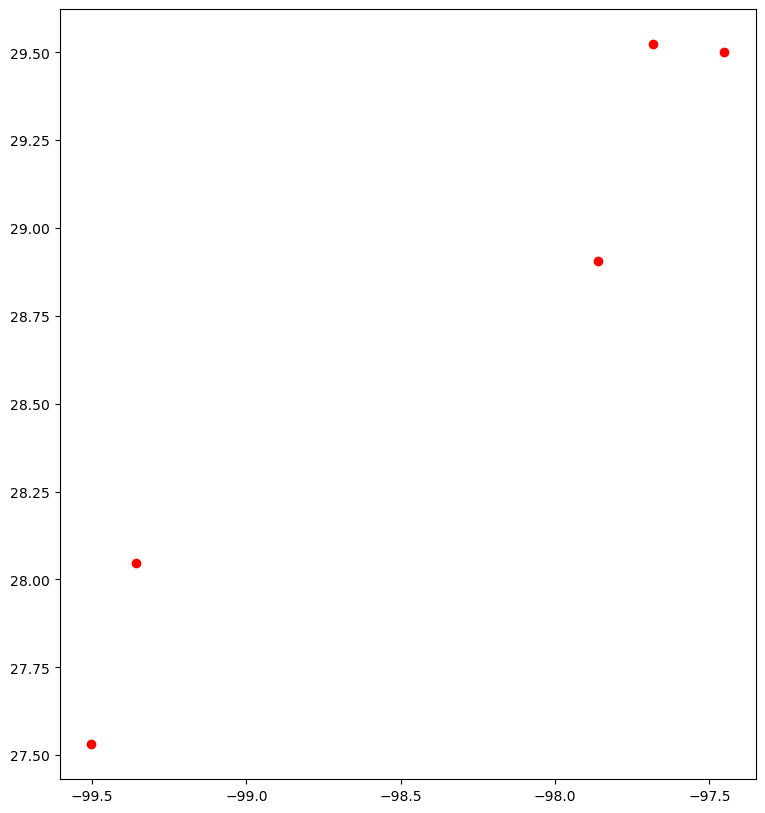

In [12]:
ax = gpd.plot(color="red", figsize=(10,10))

#cx.add_basemap(ax, crs=gpd.crs)
cx.add_basemap(ax, crs="EPSG:4326", source=cx.providers.OpenStreetMap.Mapnik, zoom=12)
cx.add_basemap(ax, crs=gpd.crs, source=cx.providers.Stamen.TonerLabels, zoom=10)

ax.tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
